<a href="https://colab.research.google.com/github/adityamavle/mimic-los-prediction/blob/master/Mimic_LOS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###EDA

###Preprocessing

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [26]:
# from google.colab import drive
# drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Healthcare-datasets/mimic3d.csv')

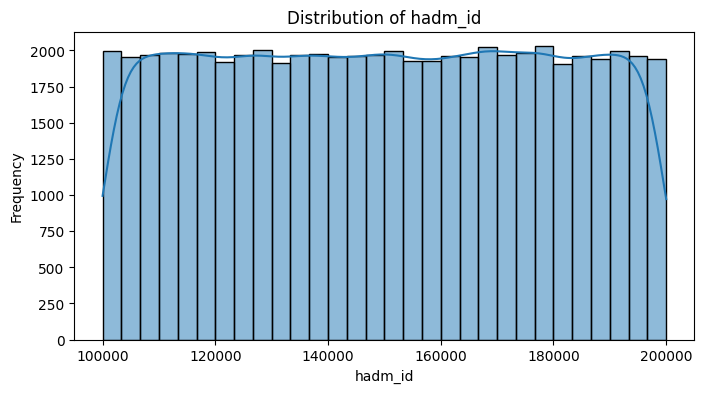

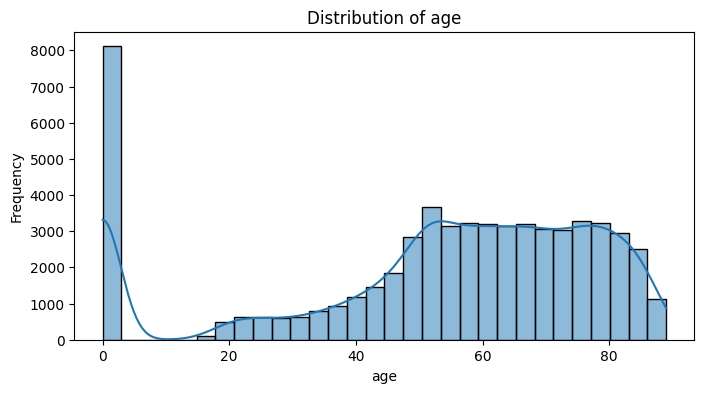

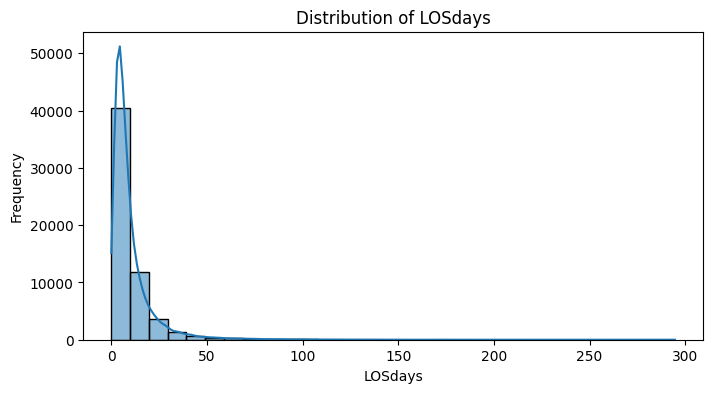

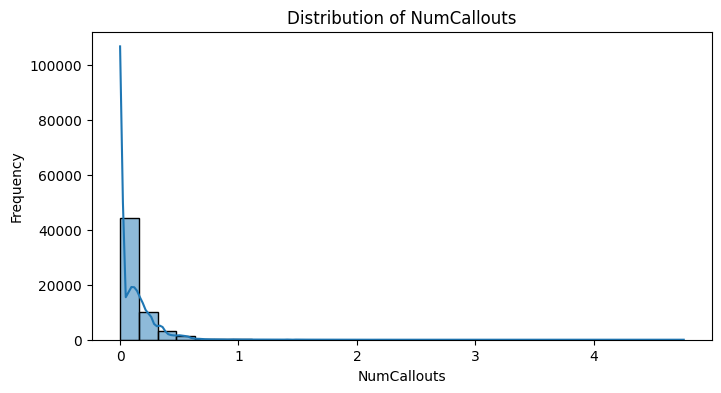

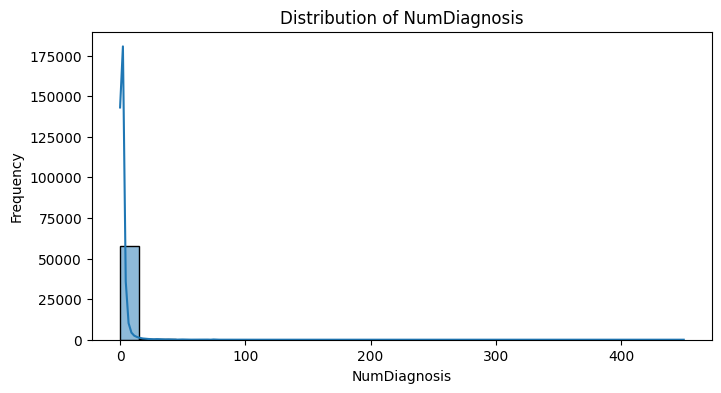

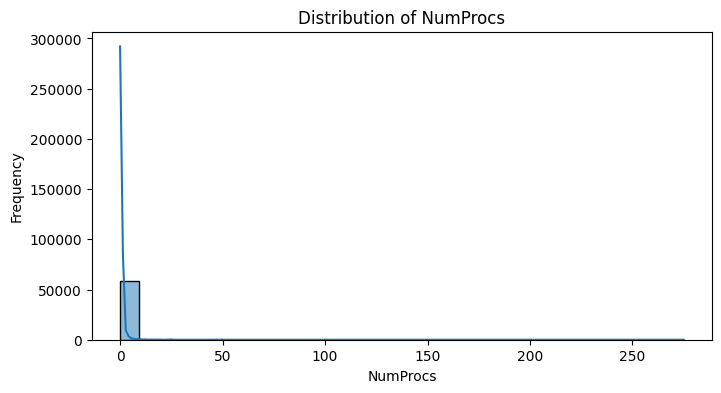

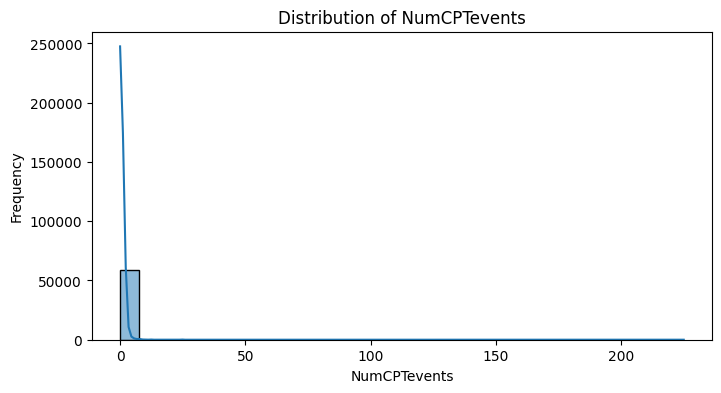

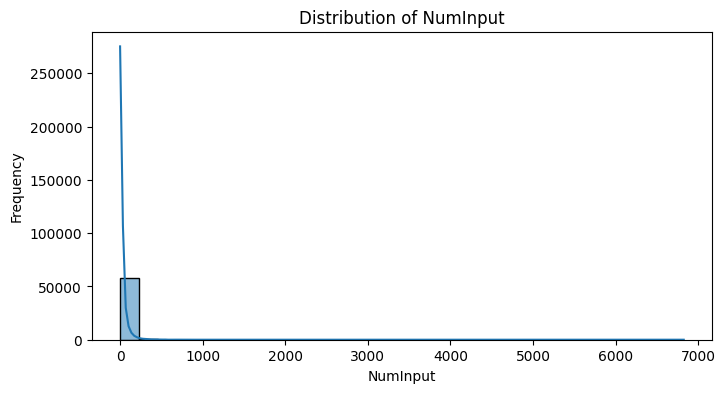

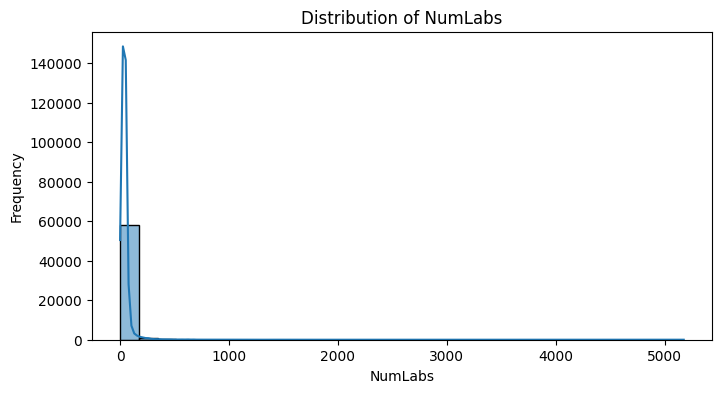

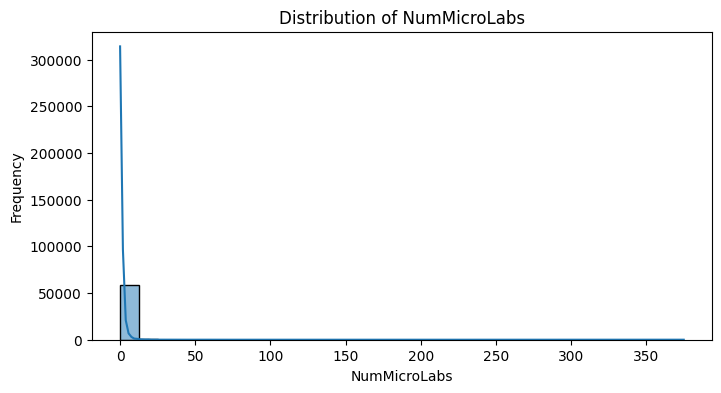

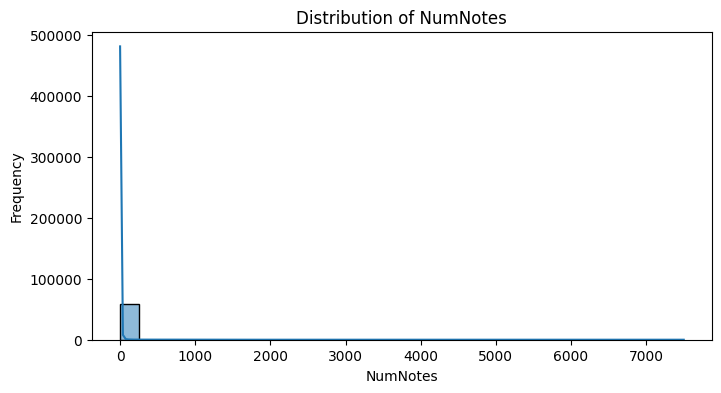

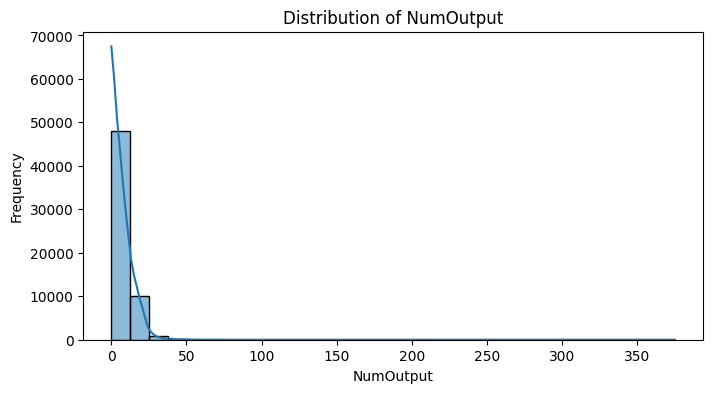

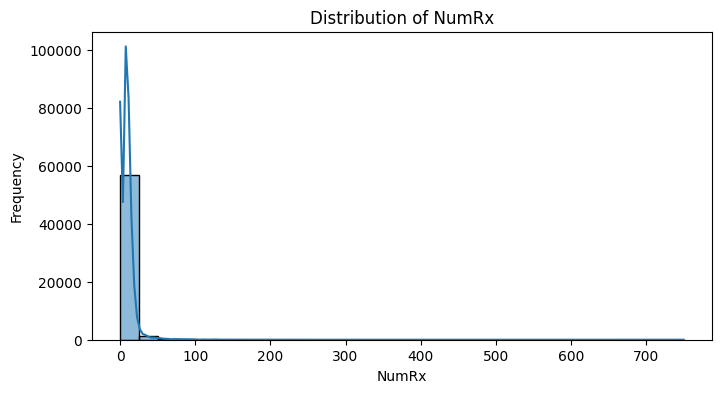

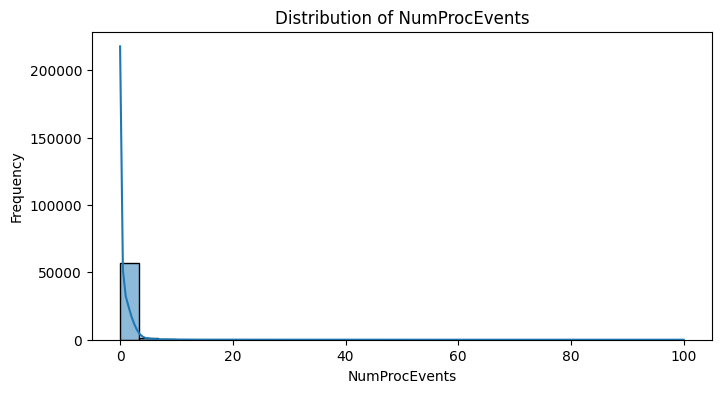

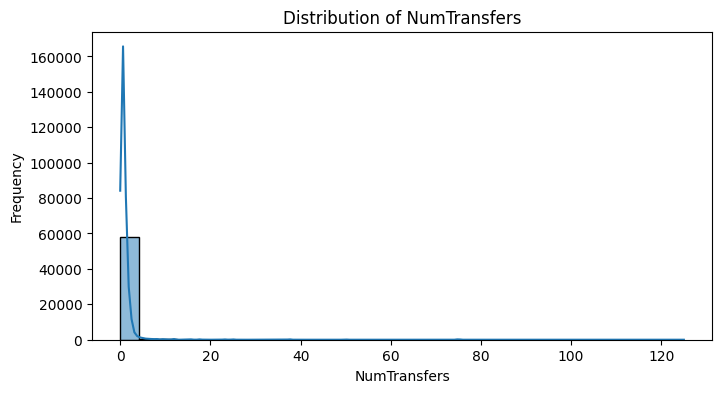

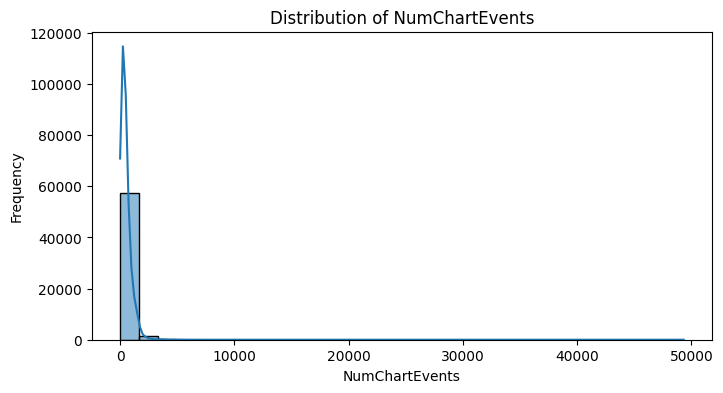

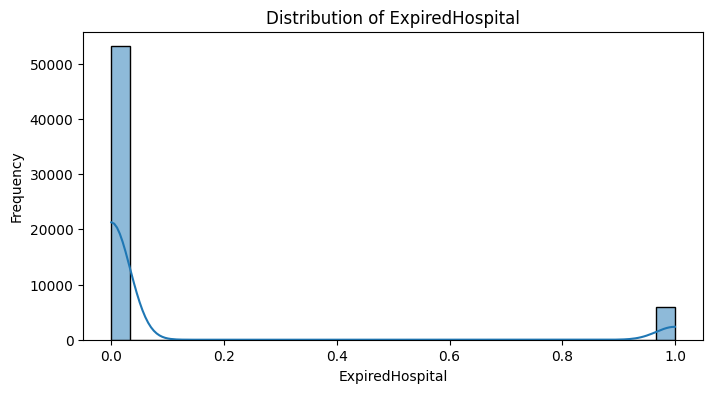

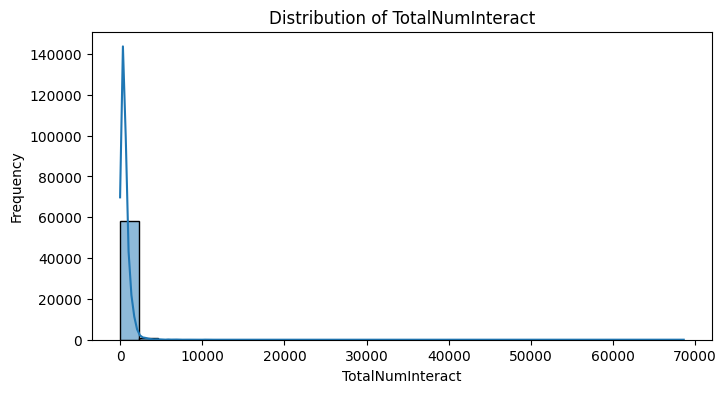

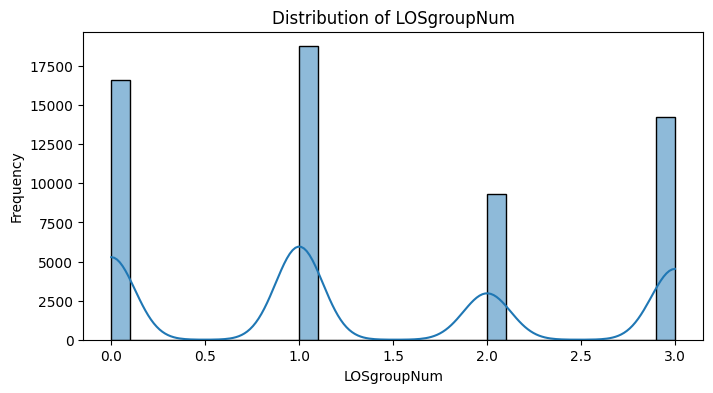

In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distribution for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [28]:
def rem_null(df):
  df['marital_status'] = df['marital_status'].fillna('UNKNOWN (DEFAULT)')
  df['religion'] = df['religion'].fillna('NOT SPECIFIED')
  df = df.dropna()
  df = df.drop(['AdmitProcedure', 'AdmitDiagnosis','ethnicity'], axis=1)
  print(df.isnull().sum())
  return df


In [29]:
df = rem_null(df)

hadm_id             0
gender              0
age                 0
LOSdays             0
admit_type          0
admit_location      0
insurance           0
religion            0
marital_status      0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumNotes            0
NumOutput           0
NumRx               0
NumProcEvents       0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
LOSgroupNum         0
dtype: int64


In [33]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values")

Index([], dtype='object')


In [31]:
def one_encode(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_cols)
    return df
df = one_encode(df)

In [35]:
df

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,...,religion_ROMANIAN EAST. ORTH,religion_UNITARIAN-UNIVERSALIST,religion_UNOBTAINABLE,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN (DEFAULT),marital_status_WIDOWED
0,100001,35,6.17,0.16,2.59,0.00,1.30,25.12,43.44,0.65,...,0,0,0,1,0,0,0,0,0,0
1,100003,59,4.04,0.25,2.23,0.99,1.98,13.61,55.94,1.24,...,0,0,0,0,0,0,0,1,0,0
2,100006,48,12.04,0.00,0.75,0.17,0.83,11.46,33.39,0.33,...,0,0,0,0,0,0,0,1,0,0
3,100007,73,7.29,0.41,0.69,0.27,0.69,20.30,32.24,0.69,...,0,0,0,0,0,1,0,0,0,0
4,100009,60,4.88,0.00,3.69,0.82,2.25,20.49,50.61,0.61,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,60,24.58,0.00,0.37,0.53,0.94,330.92,66.56,0.20,...,0,0,0,1,0,0,0,0,0,0
58972,199994,58,9.75,0.00,0.92,0.41,0.62,95.18,53.03,2.26,...,0,0,0,0,0,0,0,1,0,0
58973,199995,23,16.75,0.00,0.60,0.54,0.06,12.66,27.28,0.54,...,0,0,0,0,0,0,0,1,0,0
58974,199998,69,5.88,0.00,2.72,0.51,0.17,25.85,49.83,0.17,...,0,0,0,0,0,1,0,0,0,0


In [34]:
y = df['LOSdays']
X = df.drop('LOSdays', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

In [45]:
X_train_pca

array([[-1.09844503e+00,  9.23516960e-01,  2.28395331e-01, ...,
        -2.43580727e-01, -3.83392902e-03, -2.23543922e-02],
       [-7.80000214e-01, -4.52290331e-01, -3.17741656e-01, ...,
        -6.39765015e-02, -3.78885311e-02,  4.33181897e-02],
       [-8.05050423e-01, -3.39117647e-01,  1.96535714e-02, ...,
        -2.75238145e-01,  1.07367025e-03,  4.17494782e-02],
       ...,
       [-1.01068601e+00,  5.02085327e-01,  1.90089639e-01, ...,
         9.04363066e-04,  9.92260749e-01, -1.84495829e-02],
       [-5.81532095e-01, -8.01543120e-01,  4.47816510e-01, ...,
        -5.11916470e-02, -9.85426419e-02, -9.00468681e-02],
       [-8.18418256e-01, -7.76609770e-01,  2.19363137e-02, ...,
        -5.78950604e-02, -9.11612465e-02,  1.42985787e-02]])

### Model Training and Eval

Epoch 1/100, Loss: 86.3372
Epoch 2/100, Loss: 69.3176
Epoch 3/100, Loss: 66.9751
Epoch 4/100, Loss: 65.7054
Epoch 5/100, Loss: 63.7505
Epoch 6/100, Loss: 62.3516
Epoch 7/100, Loss: 61.2906
Epoch 8/100, Loss: 59.0110
Epoch 9/100, Loss: 57.1012
Epoch 10/100, Loss: 55.2626
Epoch 11/100, Loss: 53.1055
Epoch 12/100, Loss: 50.2059
Epoch 13/100, Loss: 48.7898
Epoch 14/100, Loss: 46.8737
Epoch 15/100, Loss: 46.0831
Epoch 16/100, Loss: 43.8621
Epoch 17/100, Loss: 42.0091
Epoch 18/100, Loss: 40.7357
Epoch 19/100, Loss: 38.4956
Epoch 20/100, Loss: 39.4101
Epoch 21/100, Loss: 36.2368
Epoch 22/100, Loss: 37.7603
Epoch 23/100, Loss: 36.3718
Epoch 24/100, Loss: 35.1579
Epoch 25/100, Loss: 34.9553
Epoch 26/100, Loss: 33.0116
Epoch 27/100, Loss: 32.9406
Epoch 28/100, Loss: 33.6682
Epoch 29/100, Loss: 32.6190
Epoch 30/100, Loss: 31.1717
Epoch 31/100, Loss: 32.7974
Epoch 32/100, Loss: 30.8205
Epoch 33/100, Loss: 30.5298
Epoch 34/100, Loss: 30.7193
Epoch 35/100, Loss: 29.3998
Epoch 36/100, Loss: 30.9764
E

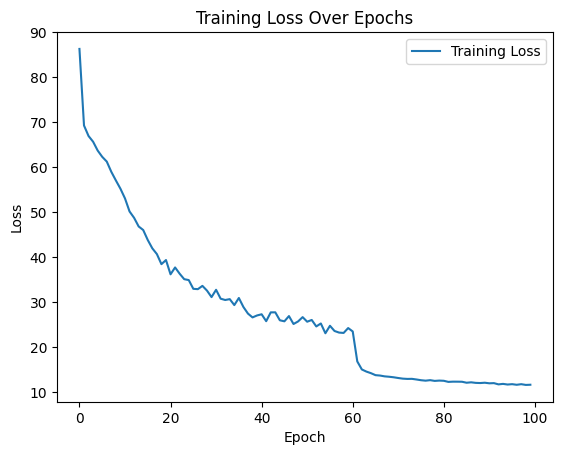

Training complete


In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

train_data = TensorDataset(torch.from_numpy(X_train_scaled).float(), torch.from_numpy(y_train.values).float())
test_data = TensorDataset(torch.from_numpy(X_test_scaled).float(), torch.from_numpy(y_test.values).float())
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
model = Net(X_train_scaled.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5)
# Early Stopping parameters
early_stopping_patience = 10
no_improvement_epochs = 0
min_val_loss = float('inf')
# Training Loop
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    if avg_loss < min_val_loss:
        min_val_loss = avg_loss
        no_improvement_epochs = 0
    else:
        no_improvement_epochs += 1

    if no_improvement_epochs >= early_stopping_patience:
        print("Stopping early due to no improvement.")
        break

    scheduler.step(avg_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}')

# Plot the training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()
print('Training complete')

In [64]:
model.eval()
total_loss = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.float(), targets.float()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        total_loss += loss.item()

average_loss = total_loss / len(test_loader)
print(f'Average Test Loss: {average_loss:.4f}')


Average Test Loss: 33.9044


In [66]:
from sklearn.metrics import r2_score
model.eval()
with torch.no_grad():
    # Assuming X_test_scaled is a numpy array, convert it to a torch tensor
    inputs = torch.tensor(X_test_scaled).float()
    predictions = model(inputs).squeeze().numpy()  # Convert predictions to numpy array

r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.7868147353609485


In [67]:
torch.save(model.state_dict(), 'mimic-los.pt')